# Prueba de Machine Learning

Caso desarrollado por: **Jean Gonzalez**

## Metodología Orientadas a Datos: CRISP-DM

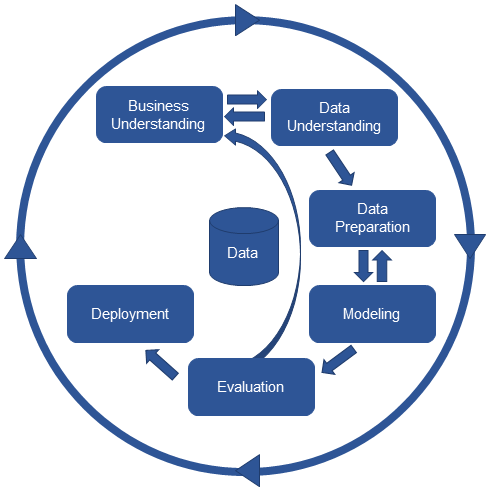

A continuación, se importarán las librerías principales que se utilizarán: Numpy, Pandas y Matplotlib.

Cargar base de datos y funciones 

In [4]:
#Librerias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import math


import seaborn as sns
from sklearn.tree import export_graphviz


#Librerias
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

#Modelos
from sklearn.impute import KNNImputer
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.cluster import KMeans

# Normalización y estandarización
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

from sklearn.metrics import silhouette_score
from sklearn.cluster import AgglomerativeClustering

#Knee "El codo"
# !pip install kneed            # instalamos el paquete con pip
# from kneed import KneeLocator

#Librerias
from scipy.spatial import distance_matrix
from scipy.cluster.hierarchy import dendrogram, linkage
import scipy.cluster.hierarchy as shc
from sklearn.cluster import AgglomerativeClustering
from mpl_toolkits.mplot3d import Axes3D

%matplotlib inline 

In [8]:
data=pd.read_excel("Base_clientes_Monopoly.xlsx", sheet_name="Transición de Negocio", header= 1)

df=pd.DataFrame(data)


df

KeyboardInterrupt: 

**Fase I Business Understading / Conocer el Negocio**

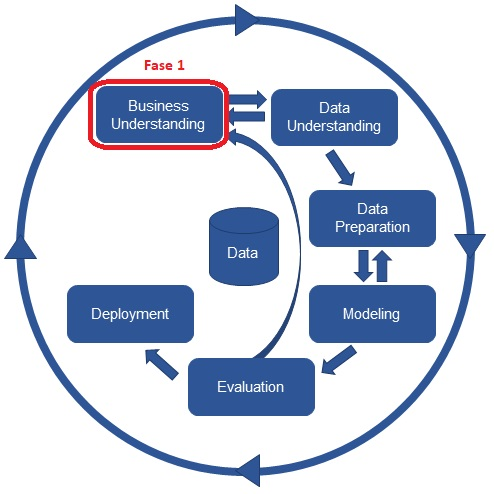


## Introducción del Caso 

El banco Monoply fue recientemente adquirido por un banco extranjero llamado "Dormammu”. Dormammu solicito nuestro servicio de ingenieros informáticos para hacer estudio sobre los clientes del banco Monopoly con el fin de analizar y detectar patrones permitiendo generar una estrategia para conseguir nuevos clientes.

Para realizar lo solicitado se trabajará con una base de datos del banco Monopoly la cual contiene información de sus clientes de los últimos 12 meses en variables mensuales por cada cliente.

 Con esta base de datos se realizarán estudios y análisis de datos buscando datos no concordantes y patrones que nos entreguen información clave para el cliente.
 

### Objetivos y exigencias del proyecto
El objetivo que se llevara a cabo en este proyecto es conocer el comportamiento y los patrones del sistema de la empresa “Monopoly” y analizar como generar estrategias para abordar nuevos clientes con sus productos financieros.

#**Fase II Data Understanding / Estudio y comprensión de los datos**      

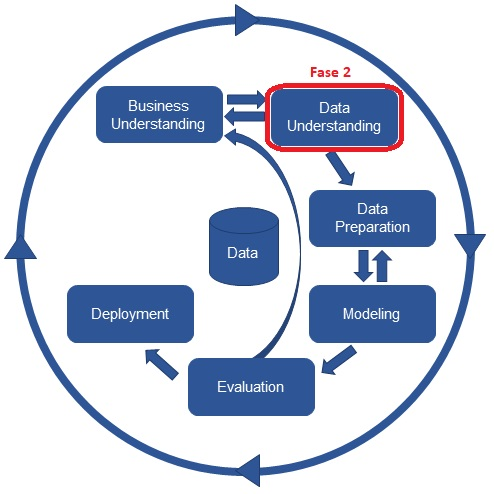

Comprensión de los datos.
La base de datos cuenta con una muestra de todos los clientes en los últimos 12 meses, la información está separada por meses para cada cliente. Cada clientes es único dentro de la base de datos y las variables asociadas son agregadas a su columna respectiva. 
##Se analiza la base de datos obteniendo
-	Cantidad de columnas y filas 
-	El tipo de datos por columna
-	Cantidad de valores Null/NaN por columna


Descripciones estadísticas de los datos numéricos
Este proceso es sobre la data expuesta, para poder conocer mejor la data y saber cómo manipularla.
La función describe () nos entrega un resumen de estadísticas descriptivas al ocupar esta función en este punto nos dimos cuenta de varios datos extraños tales como el dato count que debería definir el mismo conteo por cada columna, pero como indica la función describe excluye los datos NaN (Nulos), también nos dimos cuenta de columnas con datos mínimos en números negativos que más adelante nos dedicaremos a estudiar. 



In [ ]:
df.describe()

Analizando los datos nos podemos dar cuenta que:

-El máximo existente en la columna "antigüedad" es 324, considerando que el promedio es: 38, consideramos maximo valor de la tabla como un outliers, una vez confirmado con un gráfico de dispersión.

-En la columna "Edad" el valor mínimo es: 9 y el valor máximo es 104, tomando en cuenta que el promedio está en 38 años estos dos valores son anormales los cuales serán considerados outliers una vez se analicen.


###Conociendo la data
Nuestra data contiene 574 columnas y 51.124 filas que debemos investigar, hacer limpieza y realizar análisis dependiendo lo requerido.



In [ ]:
df.shape  


En el estudio de los tipos de datos, podemos darnos cuenta de que la mayoría de los datos son de tipo numéricos a excepción de algunos datos como sexo” Genero” e IndRev en este caso el dato sexo lo consideramos importante para saber la distribución del género de los clientes mientras que IndRev no tenemos conocimiento de que información nos entrega por el momento este dato no nos interesa ya que no nos entregaron descripción de este en específico.

In [ ]:
df.dtypes

En esta sección se muestra los tipos de datos que contiene cada columna:

•	Las tablas Id, Subsegmento, Edad, UsoL2_T01 son: int64
•	Las tablas Sexo, IndRev_T01 son: object
•	Las tablas región, UsoLI_T01, Unnamed son: float64


##Buscando Outliers

In [ ]:
y = df['Renta']
x = df['Edad']

plt.figure(figsize=(25,10))

plt.title("Distribución de clientes segun su edad y renta ")a
plt.xlabel("Edad de clientes")
plt.ylabel("Rentas")
plt.scatter(x,y)
plt.show

Como se puede apreciar en el grafico existen tres Outliers los cuales debemos analizar

1-	Cliente con edad superior a los 100 años

2- Cliente con edad de 9 años

2-	Cliente con un ingreso mucho mayor al promedio superando los 13 millones de pesos

3-	Cliente con un ingreso mucho mayor al promedio superando los 12 millones de pesos


##Anomalias

###1° Anomalía
Se detecto una anomalía donde el cliente cuenta con solo 9 años y tiene 3 servicios contratados en este banco, Una cuenta corriente, una cuenta de débito y una cuenta de crédito sumado el hecho de contar con muchas variables con valores nulos (incluyendo el sexo del cliente), en este caso el cliente cuenta con facturaciones nacionales a su nombre y sumas de tarjeta de crédito.

Por el momento estaremos utilizando KNN para imputar los datos, pero se está considerando borrar los datos de este cliente ya que no tiene ninguna actividad en el banco y/o puede ser un error de ingreso de datos referente a este cliente.



In [ ]:
df.iloc[[35823]]

###2° Anomalía
Se detecto una anomalía donde el cliente cuenta con 104 años y tiene únicamente 1 servicio contratado que sería una tarjeta de crédito y no cuenta con valores en la columna “Renta”. analizando los valores asociados a este cliente todos concuerdan en el uso de la tarjeta, se detectaron avances de créditos, montos asociados al uso de la tarjeta y cantidad de usos de la tarjeta durante el mes. Una vez analizado el cliente se consideró no realizar cambios en el mismo debido a la consistencia de los datos.




In [ ]:
df.iloc[[35001]] 

###3° y 4° Anomalía
Se detectaron 2 clientes que contaban con una renta superior a los $12.000.000 de pesos mensuales, estos fueron catalogados como outliers por el hecho de contar con un ingreso muy superior al promedio, sin embargo, luego de analizarlos conseguimos verificar que estos cuentan con transacciones mensuales en sus cuentas y que no cuentan con valores “Null” en sus registros por lo cual no se realizara alguna modificación en ellos.




In [ ]:
df.iloc[[43983, 42780]]

#**Fase III  Data Preparation  /  Análisis de datos y Selección de características**

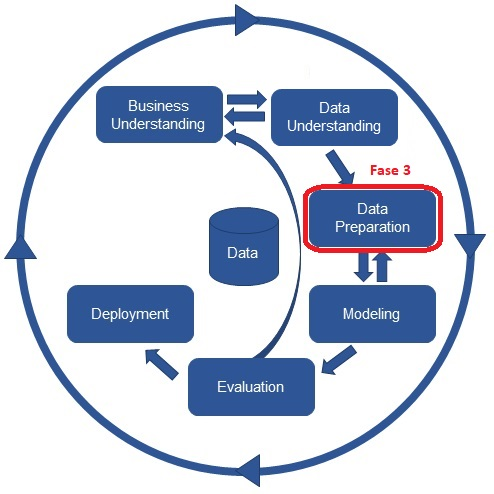

##Tratamiento de Outliers
 Para dar comienzo a la fase 3 se realizará el tratamiento de los valores considerados "outliers" a continuación se nombrarán las anomalías encontradas y el tipo tratamiento a realizar dependiendo de la calidad del dato.

###Anomalías
1° Cliente con 9 años que contiene diversos valores en null y los valores existentes a su nombre no concuerdan. Tratamiento: Eliminación
2° Cliente con 104 años que contiene el valor "renta" con valor null y sobrepasada por mucho el estándar de edad sin embargo los datos del cliente concuerdan con las cuentas tiene contratado el cliente.


In [ ]:
df.drop([35823], axis=0)

##Imputar Datos

Reconocemos la cantidad de datos nulos y columnas que los poseen

In [ ]:
df.isnull().sum().sum()

In [ ]:
Tnum = ["_T01","_T02","_T03","_T04","_T05","_T06","_T07","_T08","_T09","_T10","_T11","_T12"]
var_meses = ["Col","ColL1TE","EeccInt","EeccNac","Fac","FacAI","FacAN","FacCCOT","FacCCPC","FacCI","FacCN","FacCOL","FacDebAtm","FacDebCom","FacPAT","FlgAct","FlgActAI","FlgActAN","FlgActCCOT","FlgActCCPC","FlgActCI","FlgActCN","FlgActCOL","FlgActPAT","PagoInt","PagoNac","Txs","TxsAI","TxsAN","TxsCCOT","TxsCCPC","TxsCI","TxsCN","TxsCOL","TxsDebAtm","TxsDebCom","TxsPAT","UsoL1","UsoL2","UsoLI"]
var_montos = ["Col","ColL1TE","EeccInt","EeccNac","Fac","FacAI","FacAN","FacCCOT","FacCCPC","FacCI","FacCN","FacCOL","FacDebAtm","FacDebCom","FacPAT","PagoInt","PagoNac","UsoL1","UsoL2","UsoLI"]
var_dif_montos =["FlgAct","FlgActAI","FlgActAN","FlgActCCOT","FlgActCCPC","FlgActCI","FlgActCN","FlgActCOL","FlgActPAT","Txs","TxsAI","TxsAN","TxsCCOT","TxsCCPC","TxsCI","TxsCN","TxsCOL","TxsDebAtm","TxsDebCom","TxsPAT"]
var_independientes =["Region","Renta","Sexo","Subsegmento","Edad","Adicional","Antiguedad","CambioPin","Consumo","Debito","Ctacte","Cuentas","Hipotecario","Internauta","Monoproducto","TC","Dualidad","CUPO_L1","CUPO_MX","CUPO_L2"]

In [ ]:
for x in var_independientes:
  nulos = df[x].isnull().sum()
  if nulos > 0:  
    print(x+ " = " +str(nulos))

In [ ]:
for x in var_meses:
  for i in Tnum:
    var = x+i
    nulos = df[var].isnull().sum()
    if nulos > 0:
      print(x+ " = " +str(nulos))
      

En esta parte del análisis cambiaremos los datos nulos de regiones por la moda, ya que entre las medidas estadísticas es la que encontramos más adecuada para esta situación.

In [ ]:
df['Region'].mode()
df['Region'].fillna(13.0, inplace= True)

Seguiremos analizando y cambiaremos los datos nulos de la columna renta porque consideramos que en este punto la media generara menos cambios en los datos estadísticos generales del dataframe.

In [ ]:
df['Renta'].mean()
df['Renta'].fillna(663077.0787263963, inplace= True)

En este punto se imputará el único dato de la columna sexo en este punto solo imputaremos por la moda ya que es solo un nulo que se encuentra no generara una diferencia extrema.


In [ ]:
df['Sexo'].mode()
df['Sexo'].fillna('H', inplace= True)

Bueno en esta sección nos encontramos con una columna que es cambio de pin, los registros encontrados en esta columna son datos nulos y  “1”, definimos que los “1” significan que cambiaron su contraseña y los que se mantienen en nulos no han cambiado su contraseña y/o código pin para facilitar el proceso de análisis modificaremos los datos nulos por un digito “0”.

In [ ]:
df['CambioPin'].fillna(0, inplace= True)

Entre las demás columnas diferenciamos 2 grandes grupos los que contienen datos de montos que serán imputados por la media para generar menos cambios en las estadísticas del dataframe y los segundos que contienen binarios o números de transacciones estos serán imputados con ceros ya que no consideramos que nos generen mayores problemas a futuro.

In [ ]:
#For que imputa nulos de columnas de montos
for x in var_montos:
  for i in Tnum:
    a = x + i
    df[a].fillna(df[a].mean(), inplace = True)


#For para imputar nulos de transacciones y columnas binarias
for x in var_dif_montos:
  for i in Tnum:
    a = x + i
    df[a].fillna(0, inplace = True)
    

En este punto hemos imputado la totalidad de columnas en la que tenemos una definición de sus datos, ahora se imputaran las columnas de las que no poseemos una descripción con “0”, para quedarnos sin datos nulos en el dataframe.

In [ ]:
df.fillna(0, inplace=True)
df.isnull().sum().sum()

##Matriz de correlación

In [ ]:
df.corr()

En la matriz de correlación se evidencio que al ejecutar dicha acción nos corroboro que las columnas y el taget elegido son bastante bajas. 


*   0: asociación nula.
*   0.1: asociación pequeña.
*   0.3: asociación mediana.
*   0.5: asociación moderada.
*   0.7: asociación alta.
*   0.9: asociación muy alta.






In [ ]:
var_normal =["Region","Renta","Subsegmento","Edad","Adicional","Antiguedad","CambioPin","Consumo","Debito","Ctacte","Cuentas","Hipotecario","Internauta","Monoproducto","TC","Dualidad","CUPO_L1","CUPO_MX","CUPO_L2"]

def correlacion_normal(columna1,columna2,vardata):
  a = vardata[columna1].corr(vardata[columna2]) 
  if a > 0.2:
    print(columna1)
    print(a)
  

def correlacion_meses(columna1,columna2,vardata):
  for x in Tnum:
    col = (columna1 + str(x))
    a = vardata[col].corr(vardata[columna2])
    if a > 0.2:
      print(col)
      print(a)
  
for x in var_meses:
  correlacion_meses(x,'target',df)

for x in var_normal:
  correlacion_normal(x,'target',df)

##Escalamiento

Se dejará una copia de la data escalada para ver si funciona mejor en los entrenamientos de modelos se probará con las 2 datas sin escalar y escalada

In [ ]:
df_nor = df.drop(['Sexo','IndRev_T01','IndRev_T12','IndRev_T11','IndRev_T10','IndRev_T09','IndRev_T08','IndRev_T07','IndRev_T06','IndRev_T05','IndRev_T04','IndRev_T03','IndRev_T02','IndRev_T01'], axis=1)

# Se crea primero el objeto Standard Scaler
scaler = StandardScaler()

# Luego "entrenamos" con los datos para obtener los parámetros del escalamiento
scaler.fit(df_nor)

# Finalmente aplicamos el escalamiento
array_scaler = scaler.transform(df_nor)
array_scaler

In [ ]:
df_scaler = pd.DataFrame(array_scaler)
df_scaler.columns = df_nor.columns
df_scaler

##Metodo **El Codo (Elbow)**

In [ ]:
df_ns = df[['CUPO_L2','Edad']]
df_ns1 = df[['Antiguedad','Renta']]
df_ns2 = df[['Region','Renta','Edad']]

In [ ]:
# esto puede demorar un par de minutos

sse = [] # acá vamos a guardar el puntaje de la función objetivo
knee_x=1  
knee_y=20

for k in range(knee_x,knee_y):
  print(k)
  kkmeans = KMeans(n_clusters=k)
  kkmeans.fit(df_ns)
  sse.append(kkmeans.inertia_)

In [ ]:
kl = KneeLocator(range(knee_x,knee_y), sse, curve="convex", direction="decreasing")

print("El codo está en k =", kl.elbow)


In [ ]:
fig, ax = plt.subplots(figsize = (20, 5))

c=kl.elbow
#esta dos lineas las agrego para que se vea la elección de KneeLocator para el codo en este gráfico
ax.scatter(c, sse[2], color='red', s=200) # agregamos un punto rojo al plot de tamaño s=200 en el lugar donde se encuentra el codo
ax.text(c, sse[3]-1000, s="codo")       # agregamos un texto abajo para indicar qué representa el punto

# estas lineas son el grafico de SSEvsK
ax.scatter(range(knee_x,knee_y), sse)
ax.set_xticks(range(knee_x,knee_y))
ax.set_xlabel("Número de clusters")
ax.set_ylabel("SSE")

#**Fase IV Modeling / Modelado**

En esta fase, seleccionaremos y aplicaremos técnicas de modelado aplicando distintos parámetros para una mejor respuesta final de entrenamiento en la mayoría de los proyectos en este punto se acaba volviendo a la fase de preparación de datos para obtener mejores resultados.

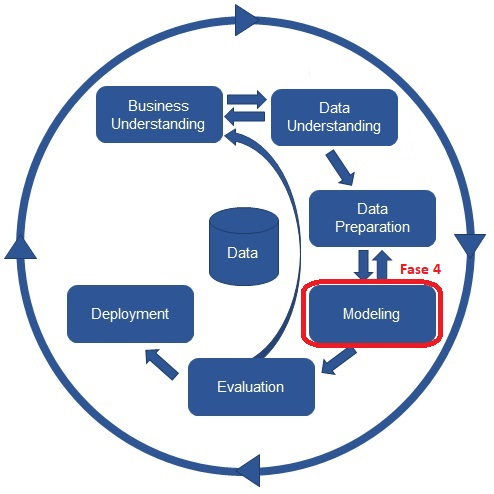|

##**Supervisado** 

### KNN CLASSIFICATOR

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

El algoritmo KNN Classificator reconoce patrones en los datos sin un aprendizaje especifico, midiendo la distancia entre grupos de datos.

Es unos de los algoritmos más simples y robustos de aprendizaje.


A continuación, eliminaremos las columnas que no ayuden en el algoritmo.

Y asignamos el target en este caso usaremos el predeterminado por el dataframe.


In [ ]:
#Aca borraremos las columnas que consideremos no ayudaran a la clasificación
df_limpieza =  df.drop(['target','Sexo','IndRev_T01','IndRev_T12','IndRev_T11','IndRev_T10','IndRev_T09','IndRev_T08','IndRev_T07','IndRev_T06','IndRev_T05','IndRev_T04','IndRev_T03','IndRev_T02','IndRev_T01'], axis=1)
#df_limpieza = df_limpieza[['Region','Edad','Subsegmento','UsoL1_T12']]
#Separamos el target
df_y_knn =  df['target']

df_x_knn = df_limpieza

Realizaremos un entrenamiento de datos asignando un tamaño de 35% de los datos con una randomización de 700 buscando conseguir una buena aleatoriedad de datos.

In [ ]:
# dividimos los datos entre training y testing set.
X_train, X_test, Y_train, Y_test = train_test_split(df_x_knn, df_y_knn, test_size=0.35, random_state=700)

Crearemos el modelo KNN Classificator


In [ ]:
# creamos el objeto
model = KNeighborsClassifier()

#### Métricas de Evaluación

Entrenamos el modelo con los datos nombrado anteriormente


In [ ]:
# entrenamos el modelo
model.fit(X_train, Y_train)

In [ ]:
# realizamos predicciones de los datos de test
y_pred = model.predict(X_test)

En los parámetros de medición nos deja ver que el modelo tiene un 93% de precisión con los valores “0” y un 41% de precisión con los datos de valores “1” lo cual esta considerablemente desbalanceado por culpa de los datos entrenados.

Podemos observar que existe una gran diferencia de valores “0” superando los 15000 en promedio mientras que los valores “1” superan apenas los 1500, dando como resultado una baja precisión en este valor precisamente por la baja cantidad de datos entrenados.


In [ ]:
print(confusion_matrix(Y_test, y_pred))

In [ ]:
print(classification_report(Y_test, y_pred))

###Árbol de Clasificación 

Los árboles de decisión son representaciones graficas de posibles soluciones a una decisión basada en ciertas condiciones, es uno de los algoritmos de aprendizaje supervisado más utilizados en machine Learning.

Existen 2 principales arboles más utilizados debido a su relativa sencilles, los cuales serían los árboles de clasificación y árbol de regresión 

En este caso usaremos un árbol de clasificación debido que el target es de tipo binaria.

("0"= Si el cliente paga el mínimo de la cuota)

("1"= si el cliente paga el total de la cuota)


Definiremos las variables a utilizar estos nos servirán para predecir si el sujeto paga el mínimo de su cuota o paga el total.

¿Porque queremos determinar si el sujeto paga el total de sus cuotas o no?
Si lo tomamos desde un punto de vista empresarial, ya que un cliente que paga el mínimo de su cuota tiende a significar que no cuenta con el capital para realizar el pago total de esta misma o no es su prioridad saldar esta cuenta.

El cliente que paga el total de su cuenta tiende a significar que cuenta con los medios para realizar el pago total del mismo, dándole una oportunidad al banco para que le ofrezca beneficios a aquellas personas que lo necesiten o hagan buen uso de estos.


In [ ]:
prediccion=df[['UsoL1_T10','UsoL2_T02']]
target=df['target']
prediccion

Declaramos el nombre de las variables para dibujar el árbol más adelante.

In [ ]:
#Nombre de las variables
nombre_prediccion= ['UsoL1_T10','UsoL2_T02']
nombre_target=['No', 'Si']

A continuación, entrenaremos nuestro modelo definiendo nuestros datos de entrenamiento y los parámetros para realizar el entrenamiento.

In [ ]:
X_entrenamiento, X_test, Y_entrenamiento, Y_test = train_test_split(prediccion, target, test_size=0.30, random_state=200)

Definimos la profundidad de nuestro árbol en 20

In [ ]:
arbol=DecisionTreeClassifier(max_depth=20)
arbol.fit(X_entrenamiento, Y_entrenamiento)

Mostramos el resultado del modelo con los datos de entrenamiento el cual nos da un porcentaje superior al 95% lo que es excelente, pero debemos tomar en cuenta los datos con los cuales está clasificando la puntuación, ya que estos son los de entrenamiento.

In [ ]:
arbol.score(X_entrenamiento, Y_entrenamiento)

Podemos observar que el resultado del entrenamiento con los datos de prueba supera el 85% lo cual es aceptable tomando en cuenta que son los datos de prueba.

In [ ]:
arbol.score(X_test, Y_test)

A continuación, mostraremos un gráfico del árbol donde podemos verlo y ver la profundidad que tiene este mismo.

In [ ]:
export_graphviz(arbol, out_file='arbol.dot', class_names=nombre_target,
                feature_names=nombre_prediccion, impurity=False, filled=True)

with open('arbol.dot') as f:
  dot_graph=f.read()
graphviz.Source(dot_graph)


#### Métricas de Evaluación

In [ ]:
model = DecisionTreeClassifier()

In [ ]:
model.fit(X_entrenamiento, Y_entrenamiento)
y_pred = model.predict(X_test)

a continuación, mediremos nuestro árbol para realizar una evaluación Y así poder tener un mejor resultado  

In [ ]:
print(confusion_matrix(Y_test, y_pred))

In [ ]:
print(classification_report(Y_test, y_pred))

Podemos observar que para el valor "0" el modelo tiene una precisión en promedio de un 92% lo cual es más que aceptable, sin embargo, para el valor "1" la precisión es de un 16% lo cual es bastante malo debido a que la muestra del valor "1" es considerablemente baja a comparación del valor "0"

###Naive Bayes (Gussian)

El modelo de Nayve Bayes o clasificador bayesiano ingenuo fundamentado en el teorema de Bayes nos da una herramienta muy potente, pondré el ejemplo que a mi correo llegan correos de amigos y spam este modelo leerá mis correos y mediante las características de palabras este clasificara entre spam y otros en este caso en particular leerá las características en las columnas y clasificara en 2 grupos según el target seleccionado.

In [ ]:


df_limpieza = df_limpieza[['Subsegmento','Renta', 'Antiguedad', 'Edad']]
df_x_n = df_limpieza
df_y_n = df['target']

In [ ]:
X_train, x_test, Y_train, Y_test = train_test_split(df_x_n, df_y_n, test_size=0.35, random_state=50)

#### Métricas de Evaluación

In [ ]:
model = GaussianNB()
model.fit(X_train, Y_train)

In [ ]:
Y_prediccion = model.predict(x_test)

In [ ]:
print(confusion_matrix(Y_test, Y_prediccion))

In [ ]:
print(classification_report(Y_test, Y_prediccion))

##**No Supervisado**

###**K-Means**

Vamos a extraer los datos para realizar el entrenamiento de los tres modelos los que analizaremos.

In [ ]:
df_ns = df[['CUPO_L2','Edad']]
df_ns1 = df[['Antiguedad','Renta']]
df_ns2 = df[['Region','Renta','Edad']]

In [ ]:
# Ajuste del modelo a los datos reducidos en componentes principales
kmeans = KMeans(n_clusters=3)
kmeans.fit(df_ns)

#Entrenando segundo modelo
kmeans1 = KMeans(n_clusters=3)
kmeans1.fit(df_ns1)

#Entrenando tercer modelo
kmeans2 = KMeans(n_clusters=2)
kmeans2.fit(df_ns2)


####Modelamiento de datos

####MODELO 1

In [ ]:
# Ploteamos los datos en el espacio de (Ingresos,Gastos) con un color por cada uno de los 5 clusters
plt.figure(figsize=(20, 7))
plt.title("Modelo 1 ")
plt.scatter(df_ns['CUPO_L2'], df_ns['Edad'], c=kmeans.labels_, cmap='rainbow')
plt.xlabel("CUPO_L2")
plt.ylabel("Edad")

**Análisis**

Contexto:
* Edad= Edad de clientes en años
* UPO_L2= Cupo de la tarjeta crédito para avances en cuotas

El grupo 1 o grupo morado tiene una gran distribución en la edad de clientes debido que ahí es donde existe la mayor cantidad de clientes del banco, podemos observar que a pesar de tener la mayor concentración de datos estos no cuentan con un cupo mayor a $200.000 pesos.

>Cabe destacar que debido al sobre posicionamiento de los puntos en el grafico se ve una cantidad disminuida de datos a diferencia de los reales.
	
El grupo 2 o grupo rojo tiene una varianza menor en la edad de los clientes a diferencia del grupo morado sin embargo los cupos asignados a cada cliente son más altos, el promedio de los cupos ronda entre los 200.000 a $400.000 pesos

El grupo 3 o grupo verde tiene una varianza aún menor a diferencia de los dos grupos anteriores pero la dispersión en los cupos asignado a cada cliente es muy grande llegando algunos clientes a cupos de $12.000.000 de pesos. 

>En este grupo en específico existen datos considerados “Outliers” debido a la gran diferencia en los valores y la cantidad de datos que existen de estos





#### Modelo Nro2


In [ ]:
# Ploteamos los datos en el espacio de (Ingresos,Gastos) con un color por cada uno de los 5 clusters
plt.figure(figsize=(13, 10))
plt.title("Modelo 2 ")
plt.scatter(df_ns1['Antiguedad'], df_ns1['Renta'], c=kmeans1.labels_, cmap='rainbow')
plt.xlabel("Antiguedad")
plt.ylabel("Renta")

**Análisis**

Contexto
* Renta= Renta/Sueldo de clientes
* Antigüedad = Antigüedad de clientes en meses

El grupo 1 o grupo morado tiene una gran dispersión de datos en los meses de antigüedad de cada cliente llegando a un promedio de 130 meses de antigüedad, sin embargo, cuenta con clientes sobrepasando este promedio llegando a los 250 meses de antigüedad, en lo que respecta a la renta podemos observar que no sobrepasan los $200.000 pesos.

>Podemos observar que existe un cliente que sobrepasa los 300 meses de antigüedad en el grupo anteriormente nombrado, debido al valor del dato este es considerado un "Outliers"

El grupo 2 o grupo rojo contiene una mayor dispersión de datos en los meses de antigüedad de cada cliente a diferencia del grupo morado, aunque esta es leve, En lo que respecta la renta de los clientes, estos siguen sin sobrepasar los $200.000 pesos.

>En este grupo podemos observar que contiene al cliente con más meses de antigüedad sobrepasando al Outlier considerado con anterioridad.

Para finalizar el grupo 3 o grupo verde tiene una dispersión menor a los grupos anteriores en lo que respecta la antigüedad, sin embargo, la dispersión de datos en la renta de los clientes es muy grande con un promedio de 300.000  pesos y los valores más altos llegando a los $13.000.000 pesos.

>Los clientes nombrados con anterioridad que cuentan con valores hasta los $13.000.000 en su renta son considerados outliers debido al gran monto, sin embargo, son una gran oportunidad para el banco en ofrecer productos a los clientes y captar su atención en mantener productos con nosotros.


####Modelo 3

In [ ]:
fig = plt.figure(figsize=(20, 14))
ax= fig.add_subplot(111, projection= '3d')
ax.scatter(xs = df_ns2['Region'],ys = df_ns2['Renta'], zs = df_ns2['Edad'], c=kmeans2.labels_, cmap='rainbow')


ax.set_title("Modelo 3")
ax.set_xlabel("Region")
ax.set_ylabel("Renta")
ax.set_zlabel("Edad")

plt.show()

**Analisis**

Contexto:
* Edad: Edad de los clientes en años
* Renta: Renta mensuales de los clientes en pesos chilenos
* Región: Región donde residen los clientes

En el siguiente grafico podemos observar dos grupos:

El grupo 1 o grupo rojo son clientes que viven mayormente en la 13ma y la 5ta región del país, también observamos que la gran mayoría de estos cuentan con un sueldo inferior a $200.000 pesos y la distribución de edad es bastante alta comenzando entre los 9 años llegando hasta los 80 años

>En este grupo es donde se concentra la población más longeva.

El grupo 2 o grupo morado son clientes que viven en mayormente en la región metropolitana que cuentan con un sueldo promedio en los 500.000  pesos y algunos superando los 800.000 pesos, también podemos observar que la dispersión de edad no es tan grande como el grupo anterior y está centrado mayormente entre los 40 a 60 años.

>Podemos observar que en el grupo 2 grupo morado algunos clientes sobrepasan los $8.000.000 de pesos llegando hasta las 12.000.000 de pesos estos clientes son considerados de gran importancia para el banco debido al ingreso mensual que tienen.

Una vez analizado el grafico podemos concluir que:
En la 13ma región se concentra la mayor población de clientes con rentas altas, esto le ayuda al banco para enfocarse en ese grupo determinado de clientes.

>Por otro lado, en la 11ma región existe una menor densidad de población y también se evidencia que la población es menos longeva y con menor renta a diferencia de otras regiones, esto es una buena oportunidad para el banco en ofrecer créditos a los clientes debido a sus bajos ingresos mensuales y entregar cuentas bancarias a futuros profesionales. 


#**Fase V Evaluation / Evaluación**

En esta fase del proyecto, se han evaluarán distintos modelos para analizando resultados de predicción de datos según el target seleccionado por la parte de entrenamiento supervisado.
Luego de la evaluación seleccionaremos el modelo que mejor se adapte a los datos.


##**Supervisado** 

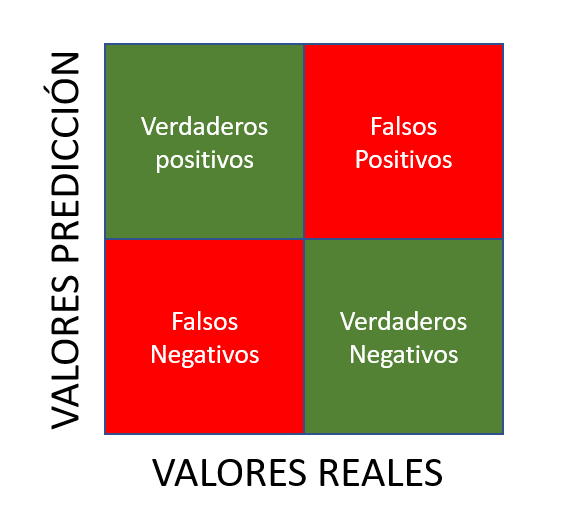

###Matriz de Confusión y Métricas de Evaluación de KNN Classificator

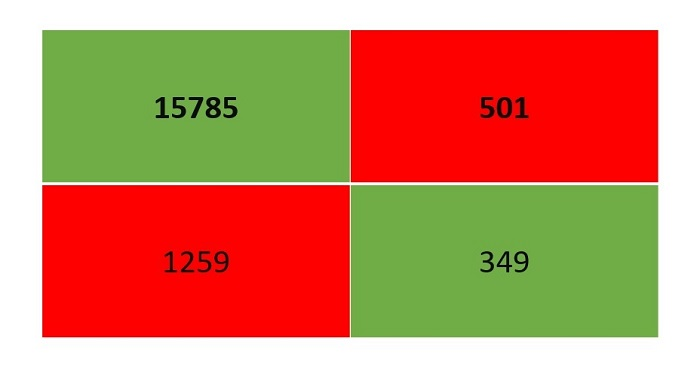

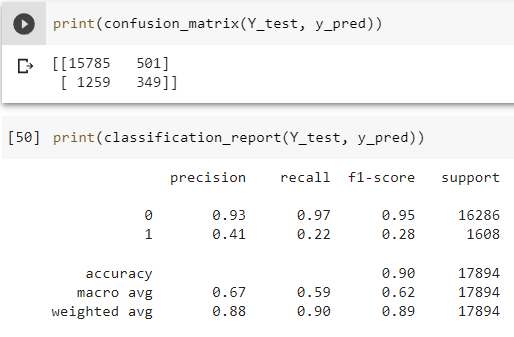

###Matriz de Confusión y Métricas de Evaluación de Árbol de Clasificación

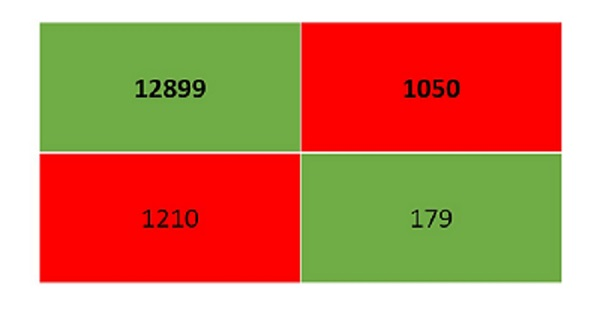

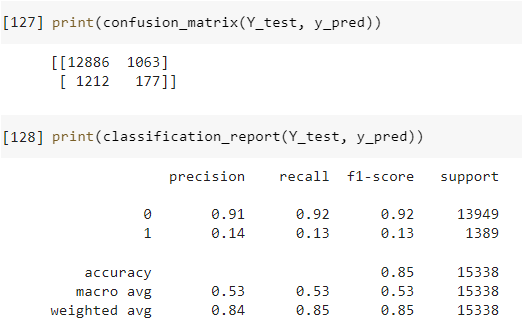

###Matriz de Confusión y Métricas de Evaluación de Naive Bayes (Gussian)

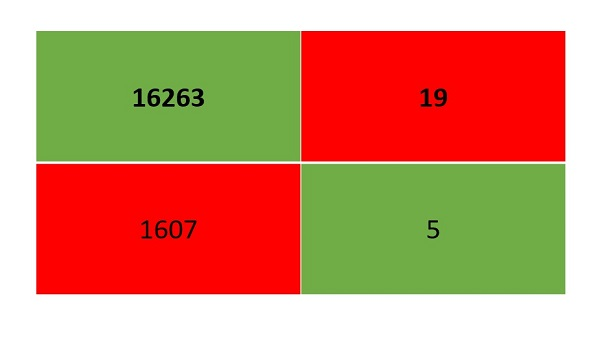

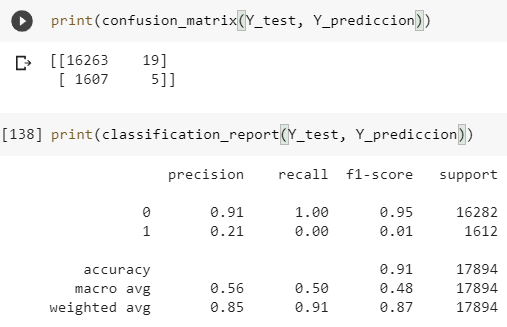

###Conclusión

En conclusión, mediante la evaluación de los tres modelos utilizados podemos encontrar similitudes en los resultados entregados, pero internamente los datos con los que se entrenaron y los hiperpárametros entregados para cada evaluación fueron variando. En el caso de KNN classificator y Nayve Bayes fueron mejor mientras más datos les entregáramos a diferencia del Árbol de decisiones, también cabe acotar que no se utilizó la data escalada, ya que esta es solo para mejorar el rendimiento de procesamiento de datos y no fue necesaria. Para finalizar, el modelo que seleccionamos como grupo, fue el KNN classificator ya que este es el que mejor resultados nos dio teniendo un 93% de aciertos en los datos de tipo “0” y un 41% en los datos de tipo “1” dándonos mejores predicciones si los clientes pagan el mínimo de la cuota o el total de esta.

## **No supervisado**

###**Conclusión**


El modelo no supervisado de datos nos permite explorar la información sin tener una línea que nos guie lo cual muchas veces resulta muy complicado, sin embargo, te permite un abanico muy grande de resultados posibles para analizar sumado a esto la necesidad de conocer cómo se relacionan unos datos con otros, hace que tu nivel de análisis incremente enormemente y que conozcas de cerca los datos que estás trabajando.
Respecto al análisis los 3 modelos representados en gráficos de dispersión están entrenados y agrupados por un modelo llamado K-Means.
El análisis realizado sobre estos 3 modelos nos permite generar tomas de decisiones al cliente y oportunidades de conocer como su empresa se a desempeñado a lo largo del tiempo.
Nuestro modelo seleccionado es el numero 3 por entregar información clave de los clientes considerando la región en la cual viven, la edad que tiene y la renta o sueldo que tienen, permitiendo conocer a grandes rasgos el posicionamiento socioeconómico de cada cliente. 


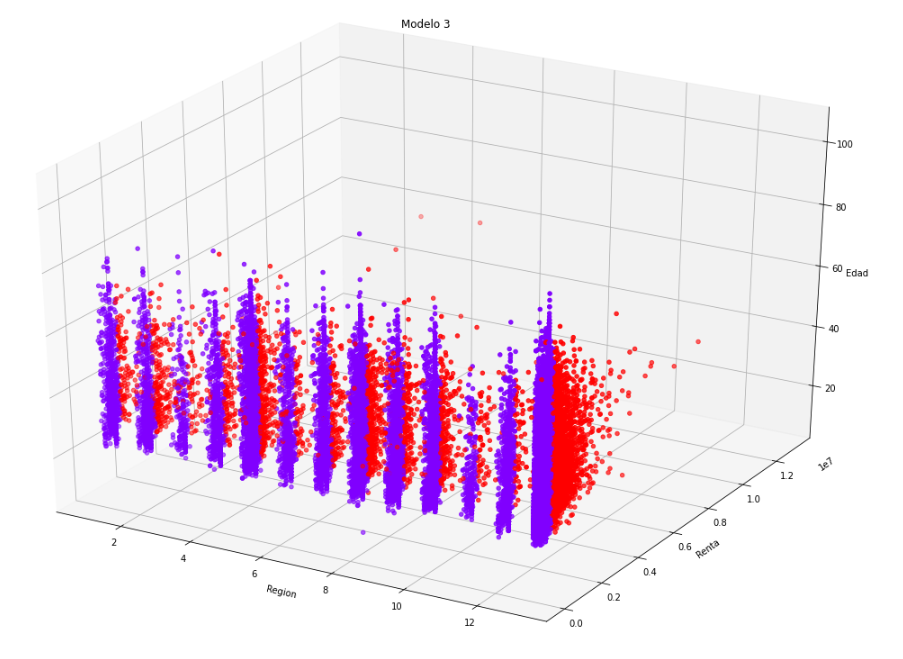